In [3]:
#! /usr/bin/env python3

#Imports
import sys
import os
import numpy as np
from ast import literal_eval
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostRegressor
from collections import Counter

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns
#import tables
import time
from scipy import stats
import glob
import pdb

In [12]:
def plot_valid(base):
    '''Plots valid predictions against the true values
    '''
    validpred = glob.glob(base+'validpred*')
    true = np.loadtxt(base+'y_valid.txt')
    df =  pd.DataFrame(list(zip(true)), columns = ['true'])

    for i in range(0, len(validpred)):
        pred = np.loadtxt(validpred[i])
        df[i] = pred
    
    for i in range(len(validpred)):
        print(i)
        g = sns.jointplot(x=i, y = 'true', data = df, kind = 'kde')
        g.annotate(stats.pearsonr)
        print('Average predicted lddt: ', np.average(df[i]))
        print('Average error',np.average(np.absolute(df['true']-df[i]))) 
        plt.show()
        plt.hist(df[i], bins = 15)
        plt.hist(df['true'], bins = 15, alpha = 0.5)
        plt.show()
                

0
Average predicted lddt:  0.747394382
Average error 0.0740654404063


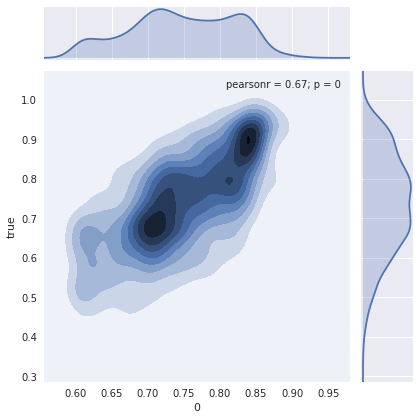

1
Average predicted lddt:  0.715238907041
Average error 0.077972273287


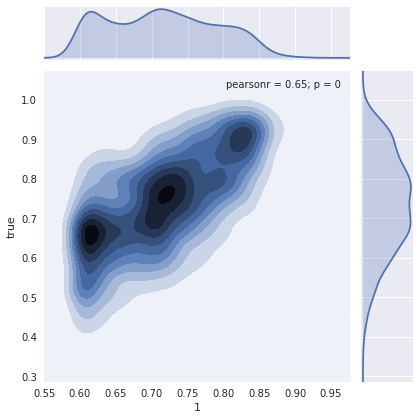

2
Average predicted lddt:  0.73828923193
Average error 0.0778128364243


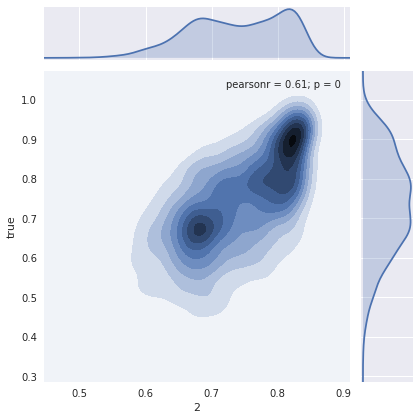

3
Average predicted lddt:  0.709037481817
Average error 0.078361713396


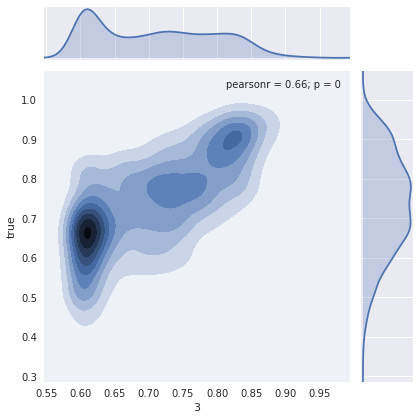

4
Average predicted lddt:  0.729281782532
Average error 0.0743595492486


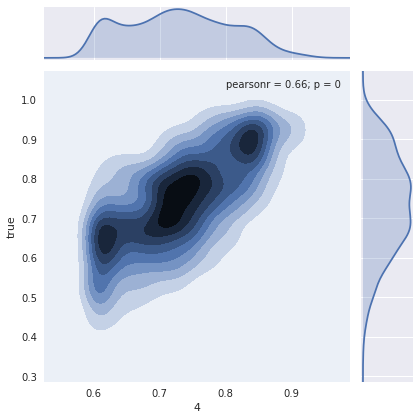

5
Average predicted lddt:  0.735322818792
Average error 0.0729477584413


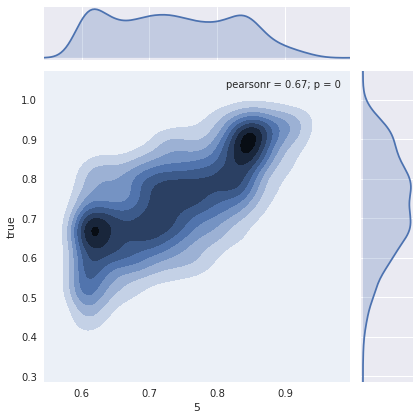

6
Average predicted lddt:  0.76545973426
Average error 0.079131122109


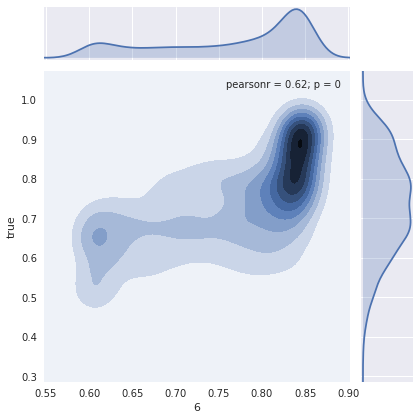

7
Average predicted lddt:  0.724305454015
Average error 0.0751557576478


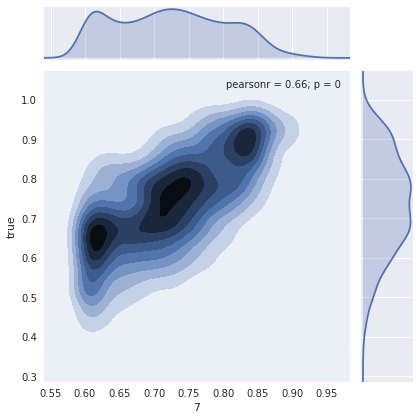

8
Average predicted lddt:  0.782210957397
Average error 0.0798697691981


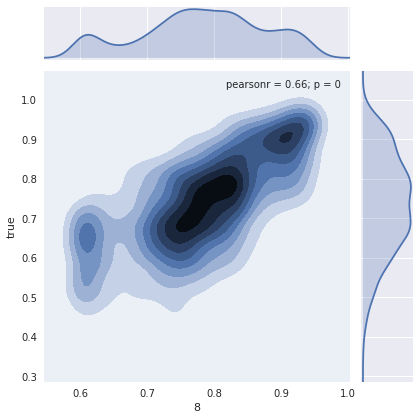

9
Average predicted lddt:  0.804446605023
Average error 0.0969319918955


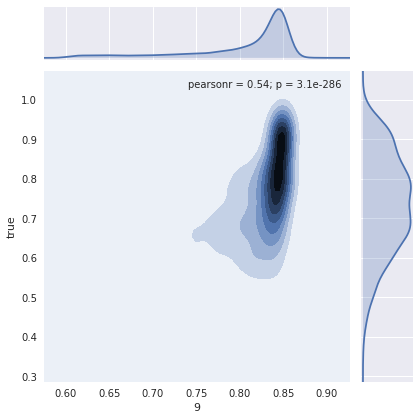

10
Average predicted lddt:  0.723412810962
Average error 0.0756324181003


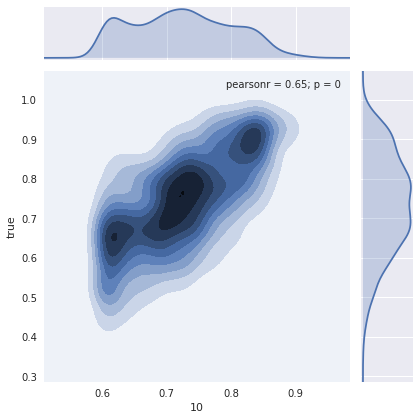

11
Average predicted lddt:  0.730546694188
Average error 0.074128156392


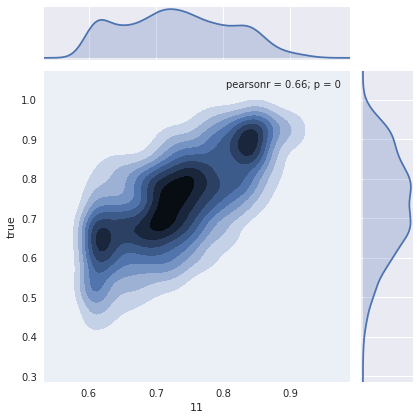

12
Average predicted lddt:  0.732445477406
Average error 0.0756978191588


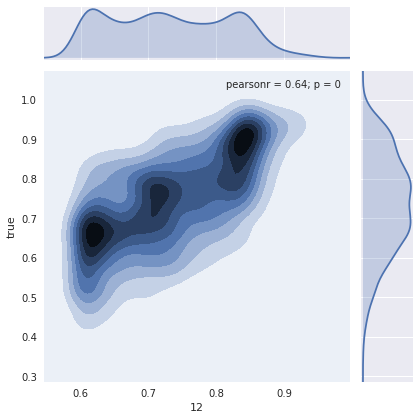

In [7]:
plot_valid('/home/p/pbryant/pfs/results/CATH/20190723/1_10_3_100_3/')         

0
Average predicted lddt:  0.751029740601
Average error 0.0753505877713


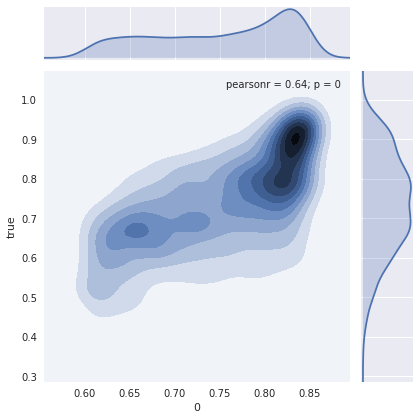

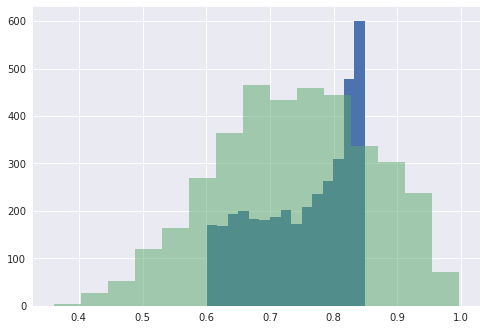

1
Average predicted lddt:  0.728984630591
Average error 0.0737543723055


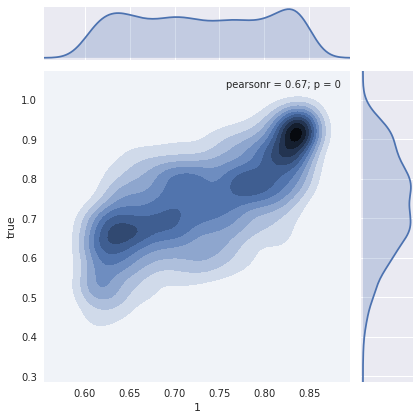

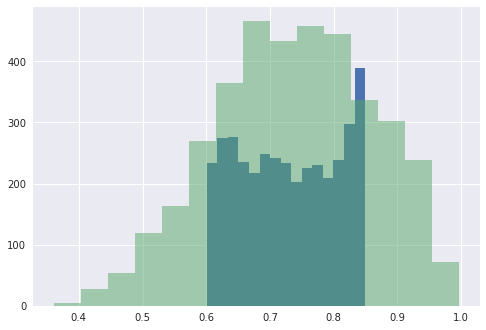

2
Average predicted lddt:  0.748957575281
Average error 0.0769404935901


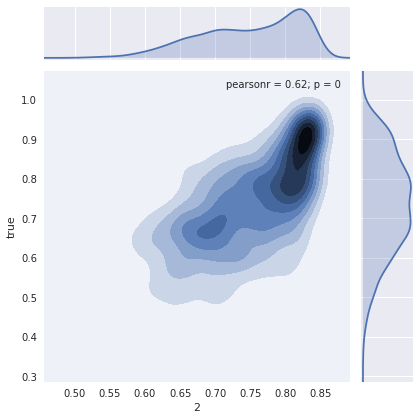

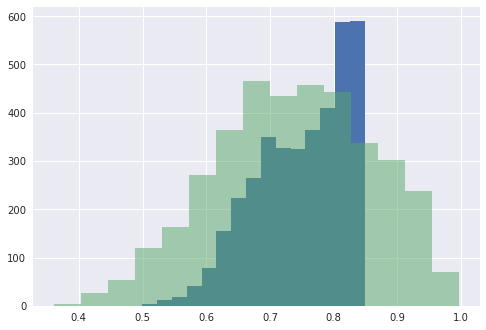

3
Average predicted lddt:  0.760737396469
Average error 0.0764429966851


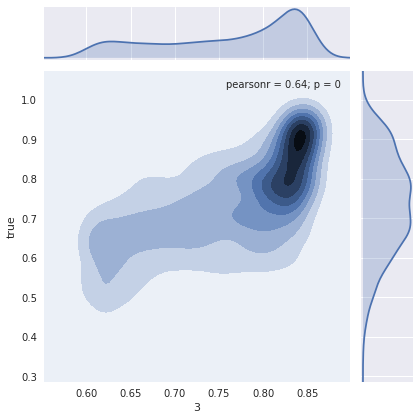

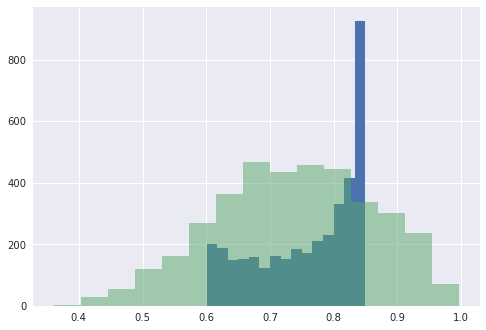

4
Average predicted lddt:  0.728951381671
Average error 0.0731723848235


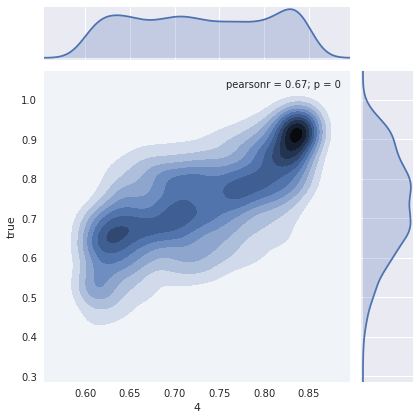

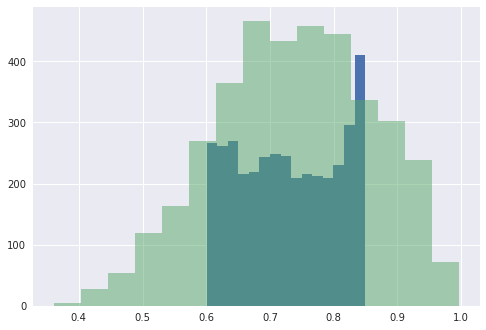

5
Average predicted lddt:  0.731876741661
Average error 0.0723365417631


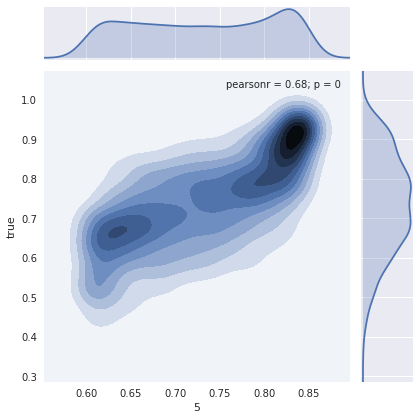

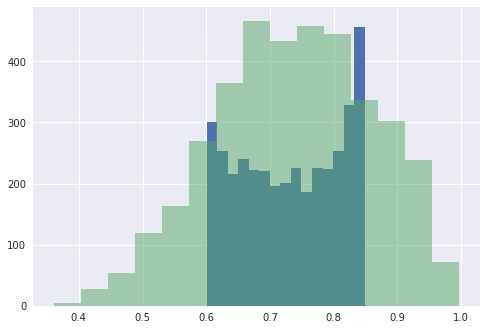

6
Average predicted lddt:  0.783513745382
Average error 0.0839043180357


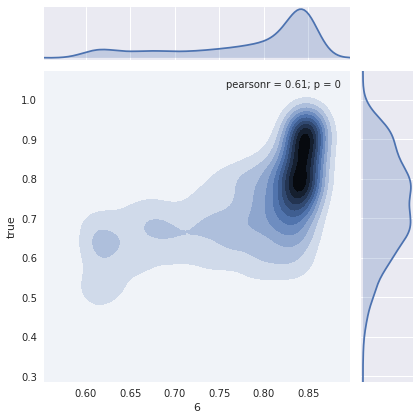

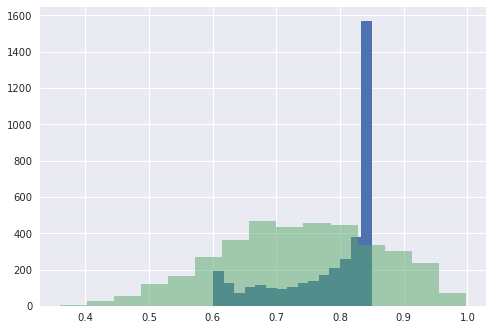

7
Average predicted lddt:  0.724570146039
Average error 0.0737998263591


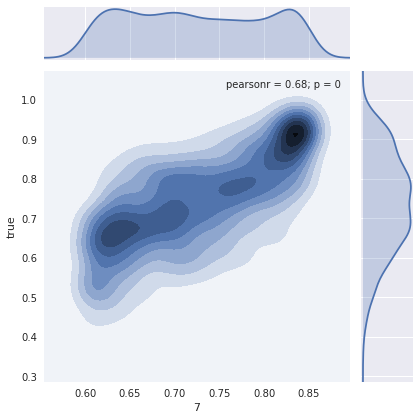

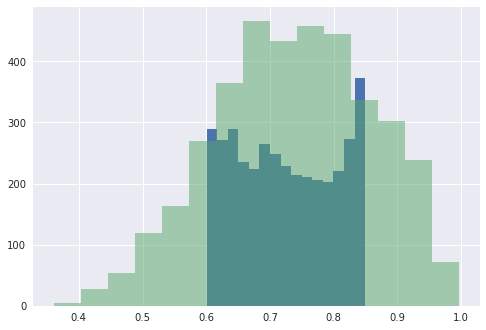

8
Average predicted lddt:  0.685854271948
Average error 0.0872264064697


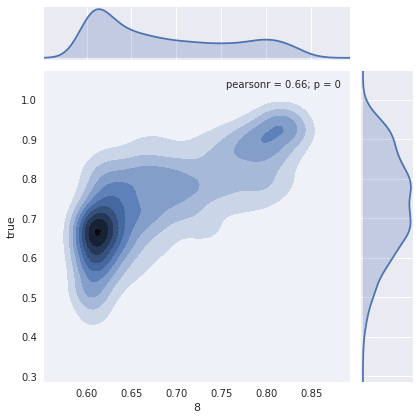

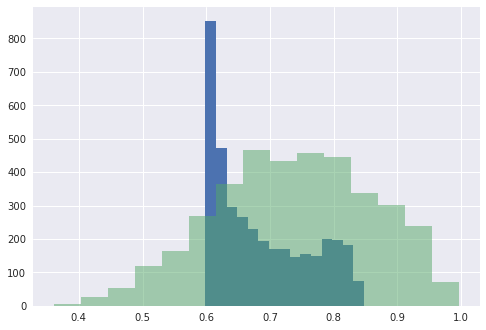

9
Average predicted lddt:  0.819812396722
Average error 0.107970162856


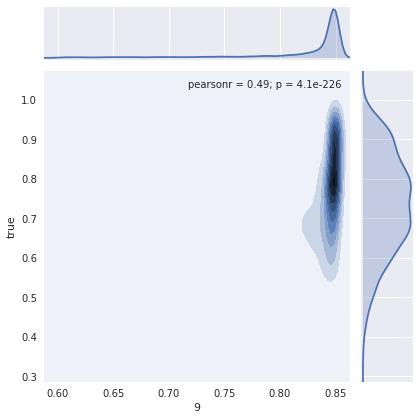

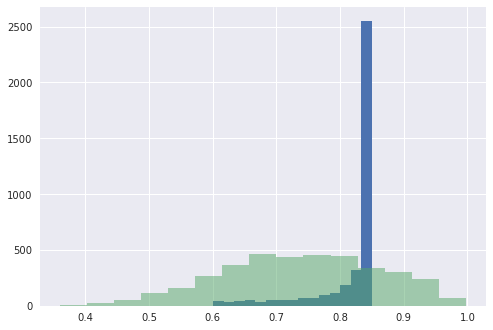

10
Average predicted lddt:  0.732955391472
Average error 0.0728202820125


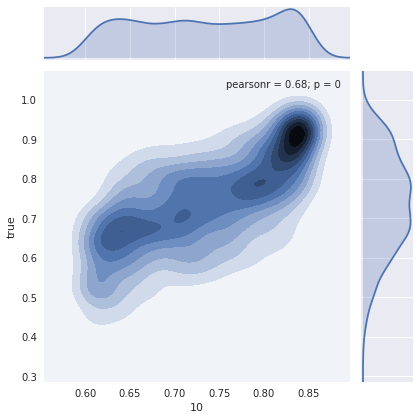

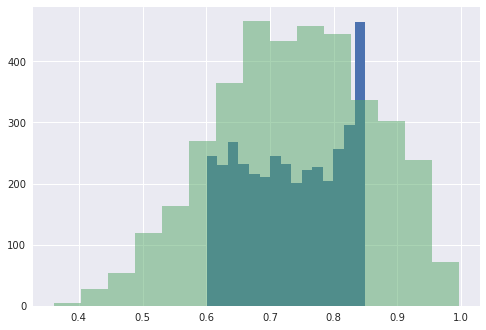

11
Average predicted lddt:  0.729184401445
Average error 0.0729545868844


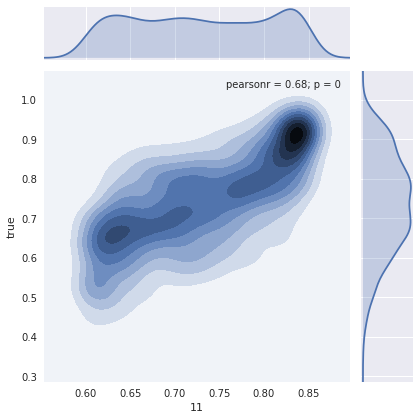

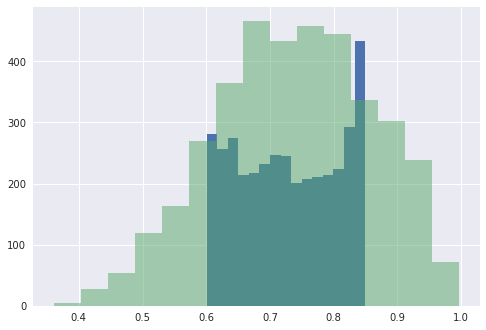

12
Average predicted lddt:  0.721372619816
Average error 0.0750454460653


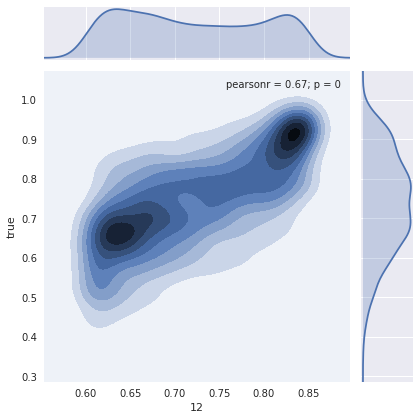

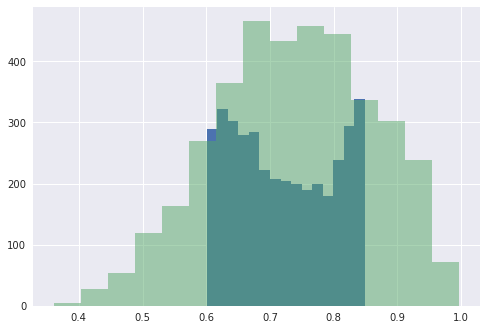

In [13]:
plot_valid('/home/p/pbryant/pfs/results/CATH/20190723/1_10_3_100_6/')

0
Average predicted lddt:  0.764754777796
Average error 0.0873681912718


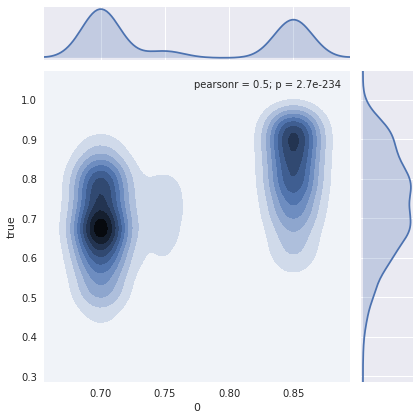

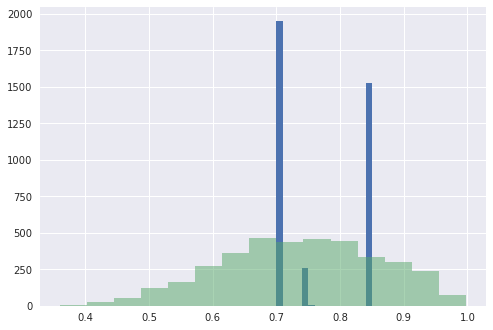

1
Average predicted lddt:  0.732093446813
Average error 0.0912198767958


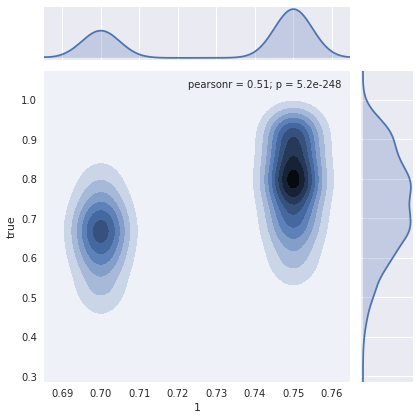

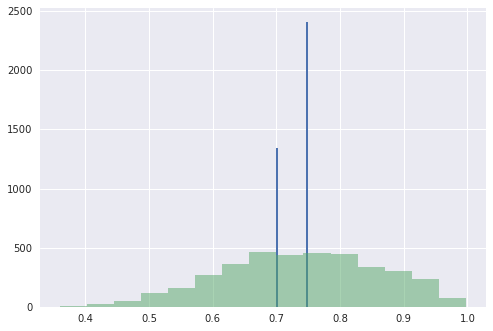

2
Average predicted lddt:  0.770121044046
Average error 0.0781671372187


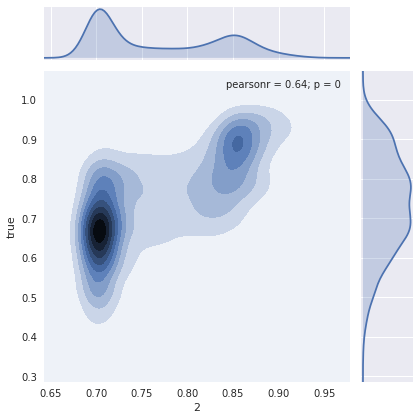

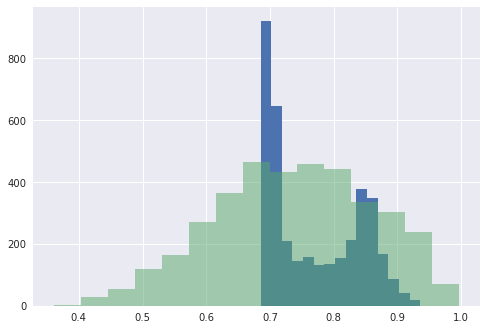

3


/hpc2n/eb/software/Core/Anaconda3/4.4.0/lib/python3.6/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/hpc2n/eb/software/Core/Anaconda3/4.4.0/lib/python3.6/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/hpc2n/eb/software/Core/Anaconda3/4.4.0/lib/python3.6/site-packages/statsmodels/nonparametric/_kernel_base.py:514: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
/hpc2n/eb/software/Core/Anaconda3/4.4.0/lib/python3.6/site-packages/matplotlib/contour.py:1514: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/hpc2n/eb/software/Core/Anaconda3/4.4.0/lib/python3.6/site-packages/matplotlib/contour.py:1515: UserWarning: Wa

Average predicted lddt:  0.737843035937
Average error 0.0948762163954


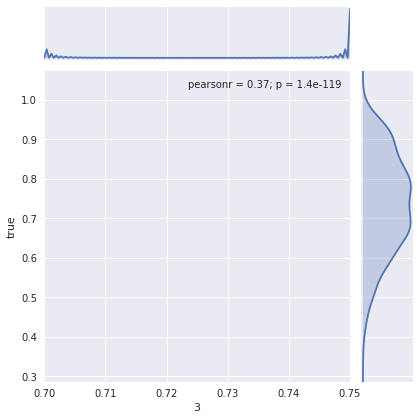

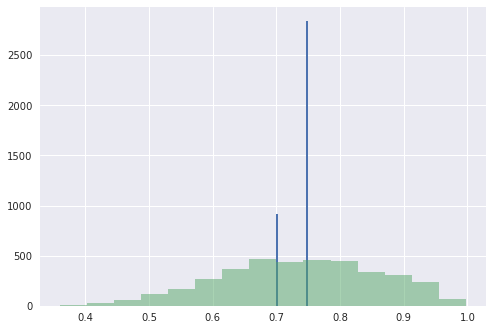

4
Average predicted lddt:  0.728123205737
Average error 0.0903361968862


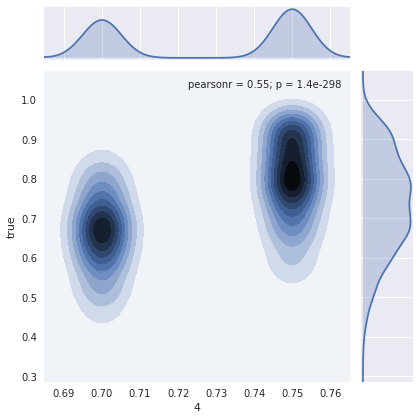

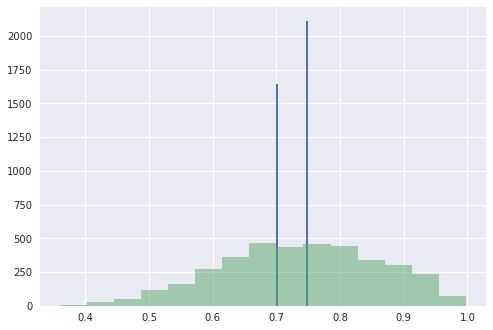

5
Average predicted lddt:  0.723065888872
Average error 0.0910154572057


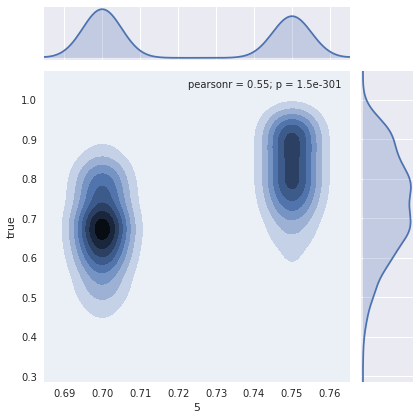

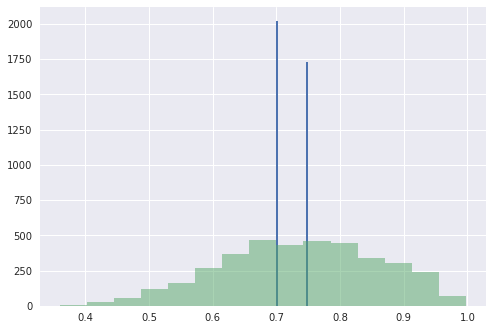

6
Average predicted lddt:  0.749617299758
Average error 0.082212122487


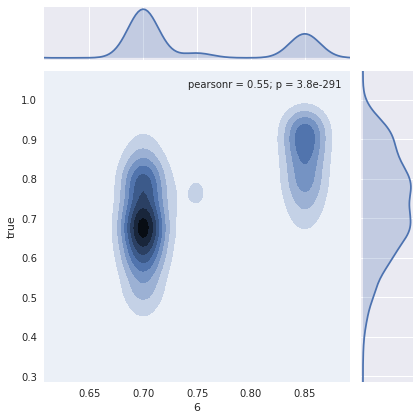

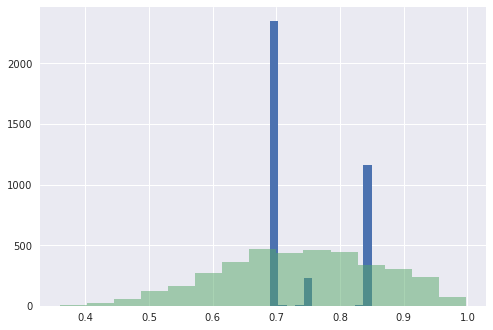

7
Average predicted lddt:  0.731738124044
Average error 0.0910311963311


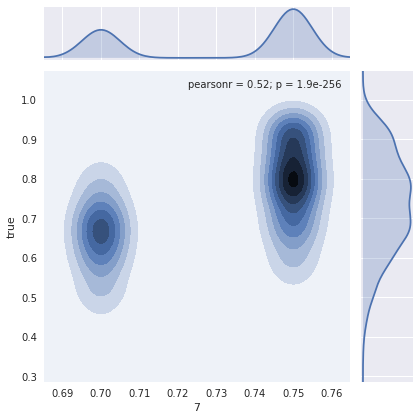

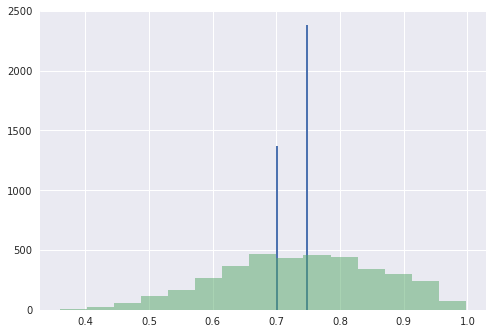

8
Average predicted lddt:  0.73557810191
Average error 0.0823190109614


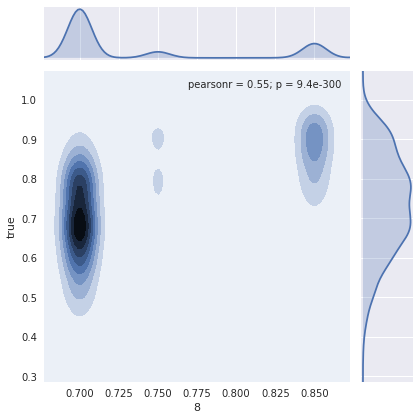

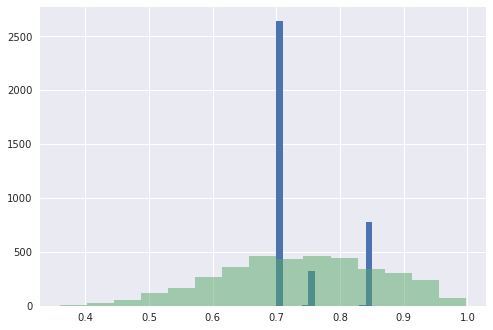

9
Average predicted lddt:  0.707500476292
Average error 0.0994025171935


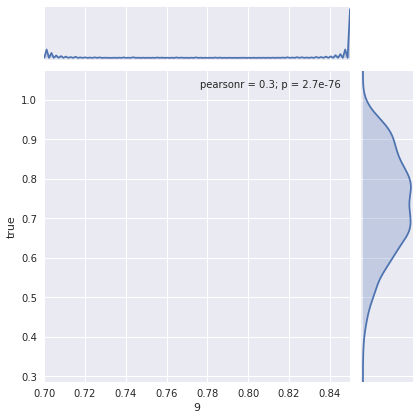

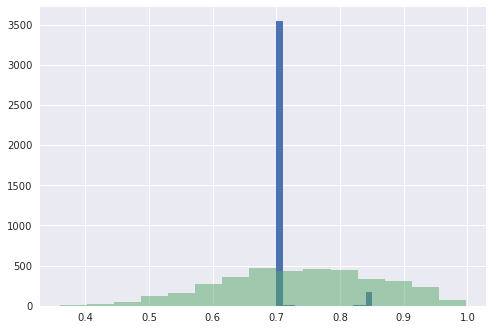

10
Average predicted lddt:  0.729192499795
Average error 0.0904200136459


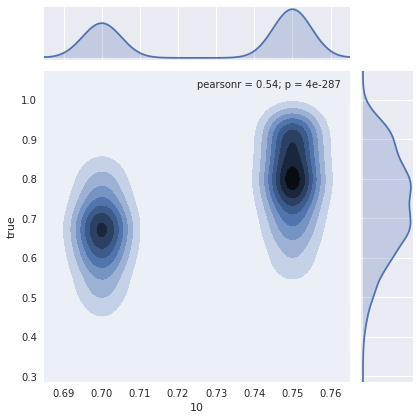

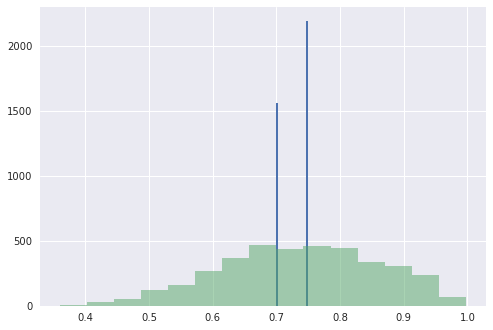

11
Average predicted lddt:  0.729829372565
Average error 0.0905185557115


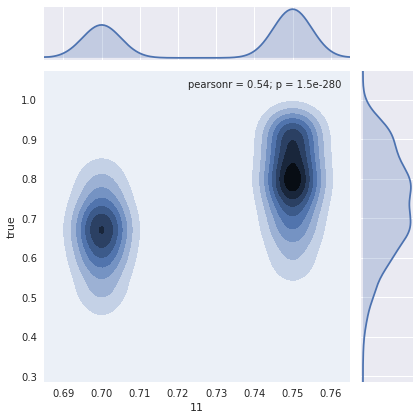

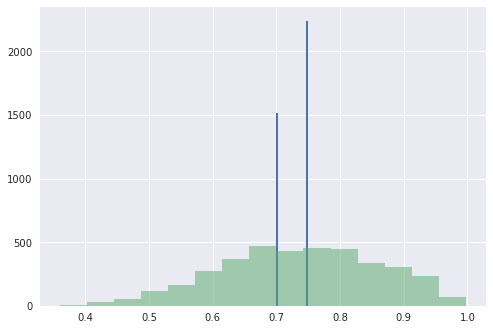

12
Average predicted lddt:  0.721993918039
Average error 0.0919976488199


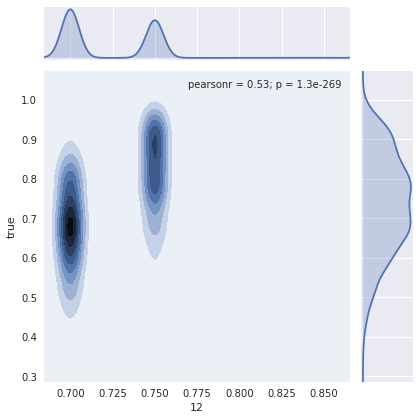

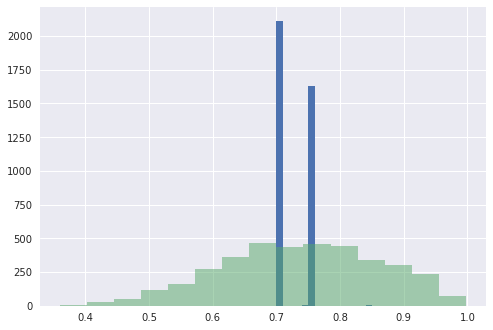

In [14]:
plot_valid('/home/p/pbryant/pfs/results/CATH/20190723/2_10_3_100_3/')

0


/hpc2n/eb/software/Core/Anaconda3/4.4.0/lib/python3.6/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/hpc2n/eb/software/Core/Anaconda3/4.4.0/lib/python3.6/site-packages/matplotlib/contour.py:1514: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/hpc2n/eb/software/Core/Anaconda3/4.4.0/lib/python3.6/site-packages/matplotlib/contour.py:1515: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/hpc2n/eb/software/Core/Anaconda3/4.4.0/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/hpc2n/eb/software/Core/Anaconda3/4.4.0/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2

Average predicted lddt:  0.75
Average error 0.101257984537


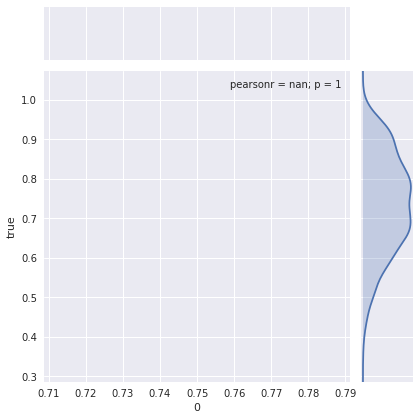

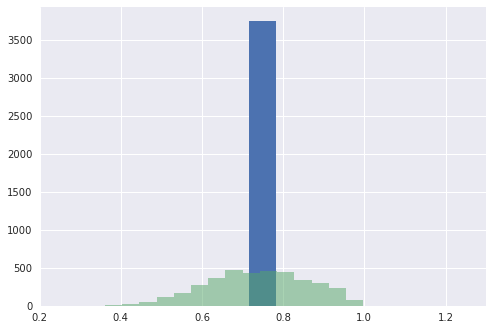

1
Average predicted lddt:  0.75
Average error 0.101257984537


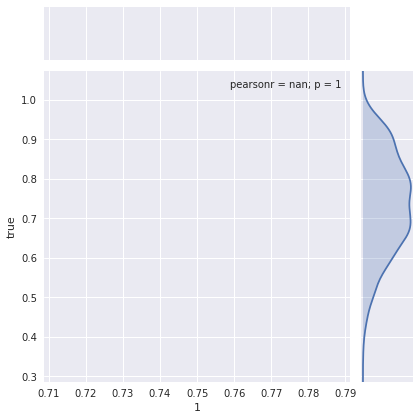

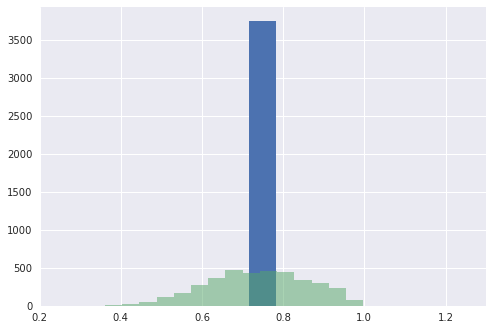

2
Average predicted lddt:  0.727396081922
Average error 0.0906470484543


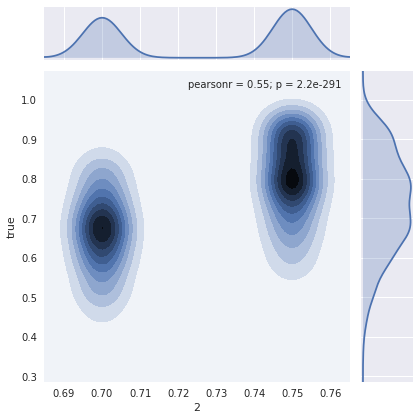

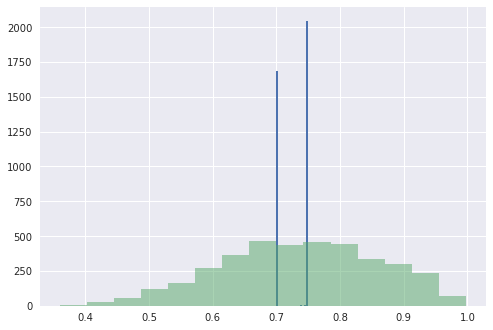

3
Average predicted lddt:  0.75
Average error 0.101257984537


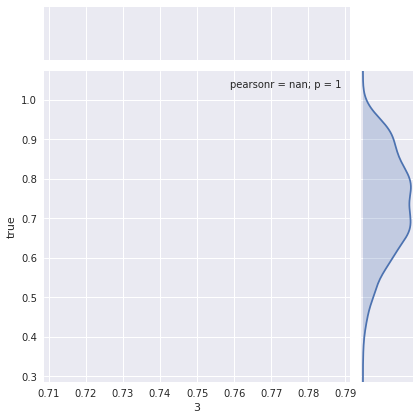

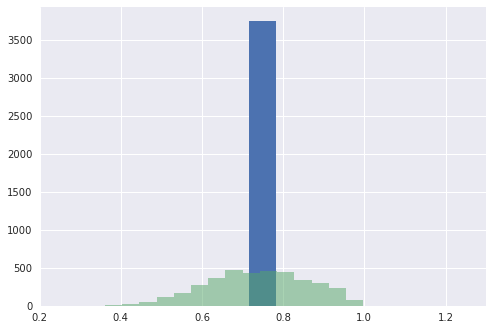

4
Average predicted lddt:  0.75
Average error 0.101257984537


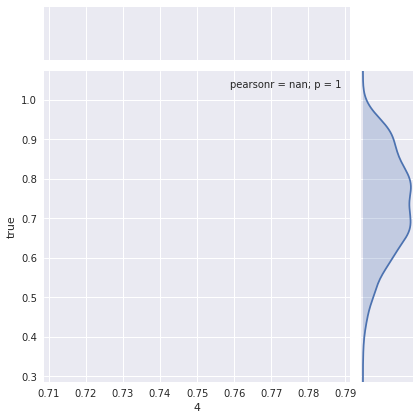

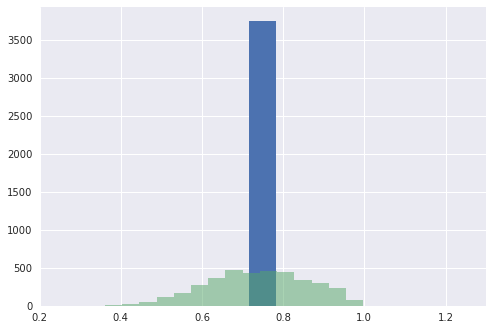

5
Average predicted lddt:  0.75
Average error 0.101257984537


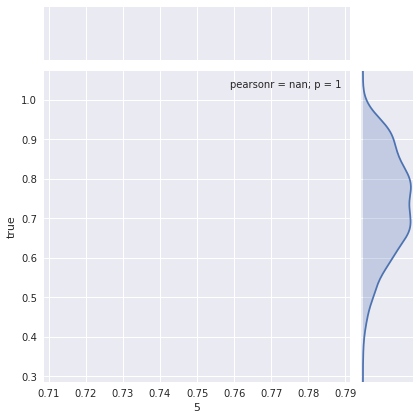

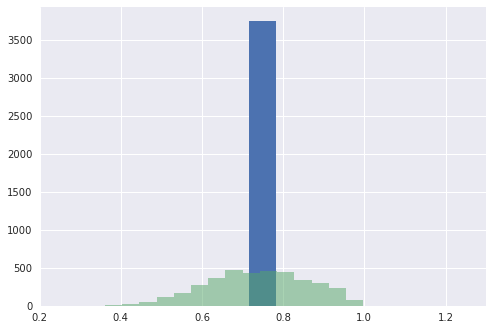

6
Average predicted lddt:  0.75
Average error 0.101257984537


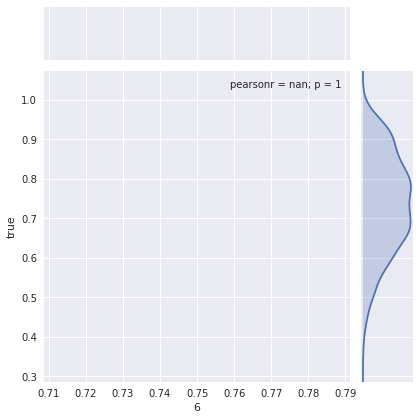

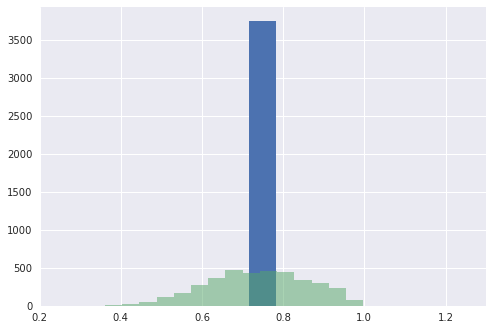

7
Average predicted lddt:  0.75
Average error 0.101257984537


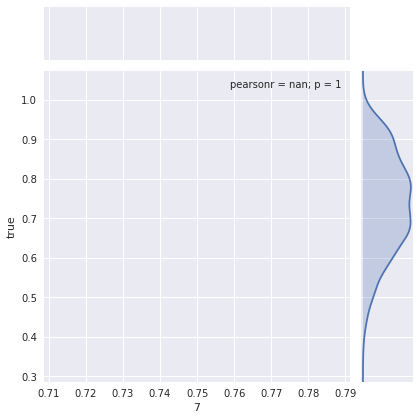

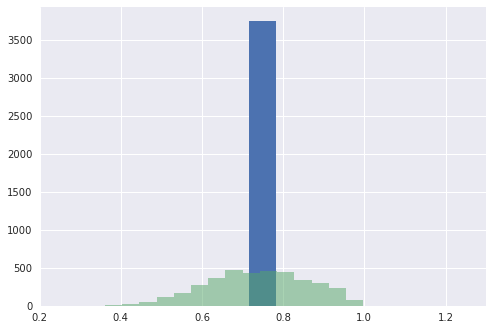

8
Average predicted lddt:  0.75
Average error 0.101257984537


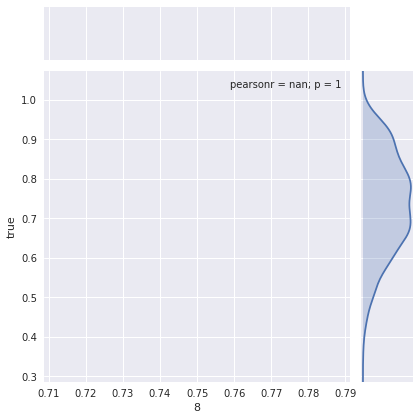

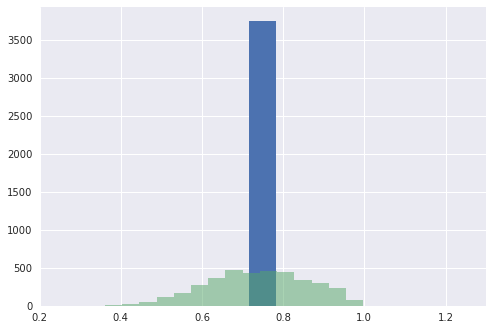

9
Average predicted lddt:  0.730075851722
Average error 0.09179775645


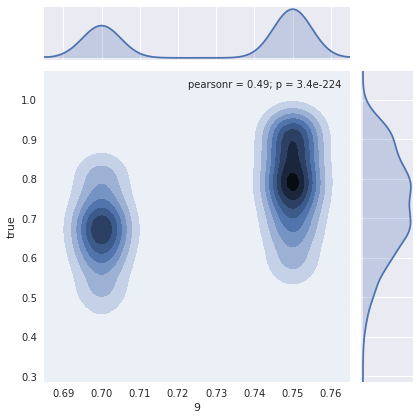

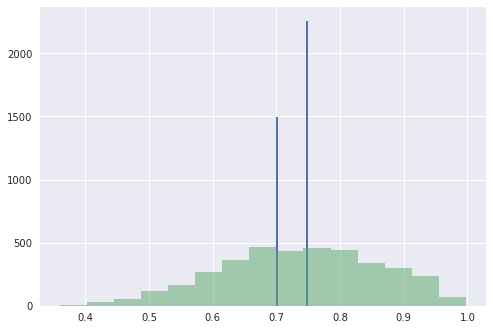

10
Average predicted lddt:  0.75
Average error 0.101257984537


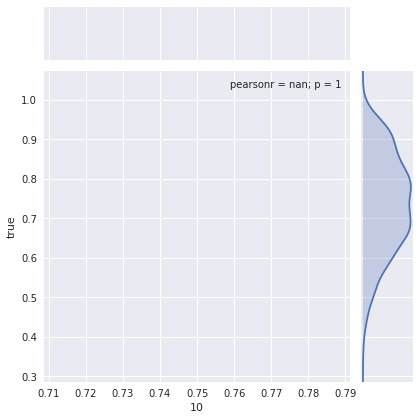

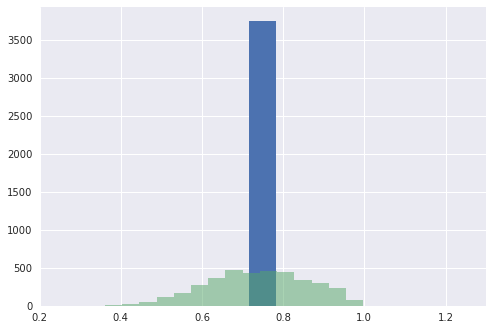

11
Average predicted lddt:  0.75
Average error 0.101257984537


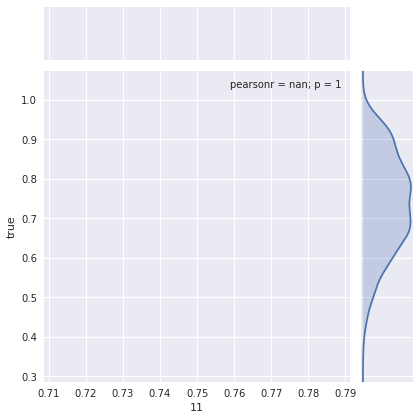

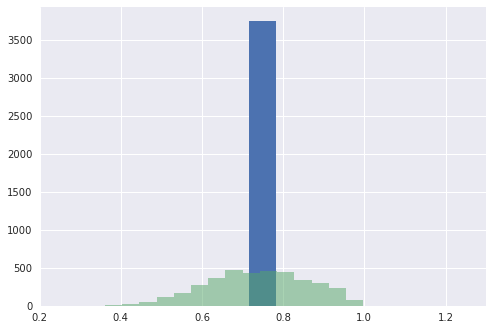

12
Average predicted lddt:  0.75
Average error 0.101257984537


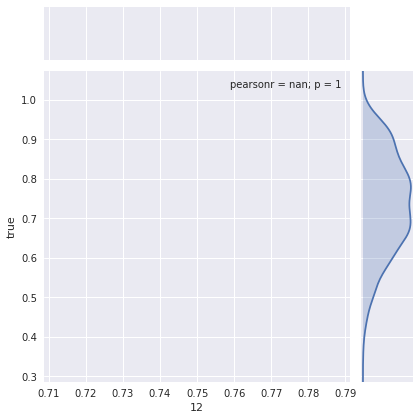

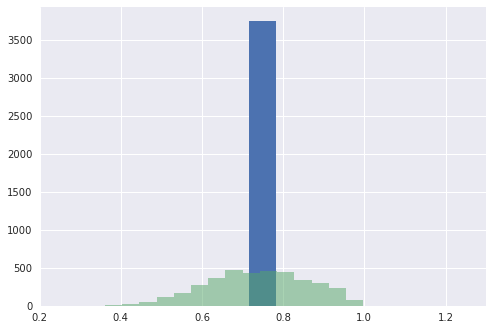

In [15]:
plot_valid('/home/p/pbryant/pfs/results/CATH/20190723/1_10_3_900_6/')

0


/hpc2n/eb/software/Core/Anaconda3/4.4.0/lib/python3.6/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/hpc2n/eb/software/Core/Anaconda3/4.4.0/lib/python3.6/site-packages/matplotlib/contour.py:1514: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/hpc2n/eb/software/Core/Anaconda3/4.4.0/lib/python3.6/site-packages/matplotlib/contour.py:1515: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/hpc2n/eb/software/Core/Anaconda3/4.4.0/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/hpc2n/eb/software/Core/Anaconda3/4.4.0/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2

Average predicted lddt:  0.75
Average error 0.101257984537


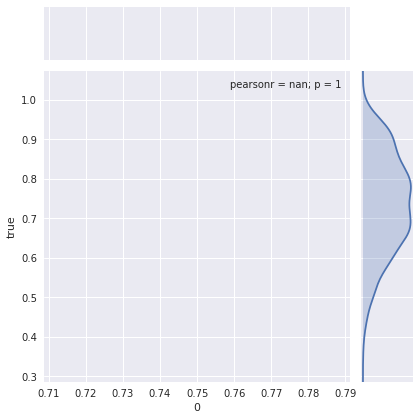

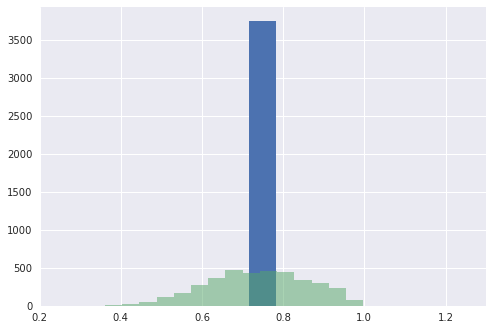

1
Average predicted lddt:  0.75
Average error 0.101257984537


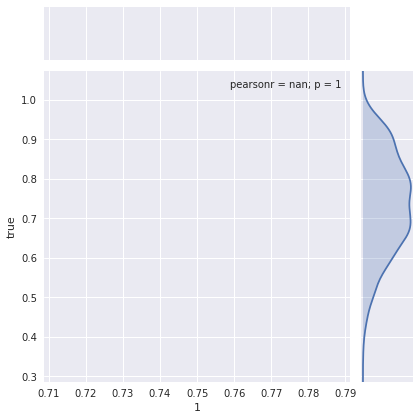

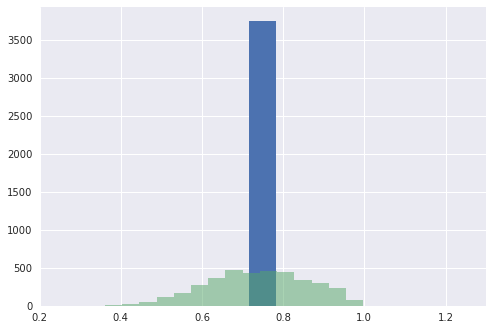

2
Average predicted lddt:  0.796354373815
Average error 0.107965323616


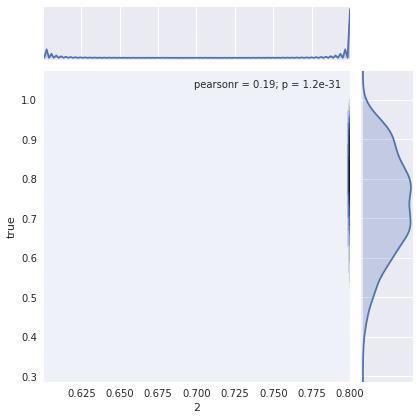

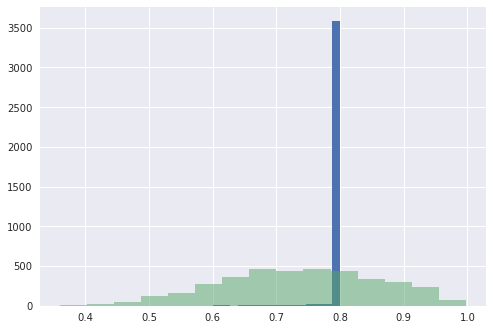

3
Average predicted lddt:  0.75
Average error 0.101257984537


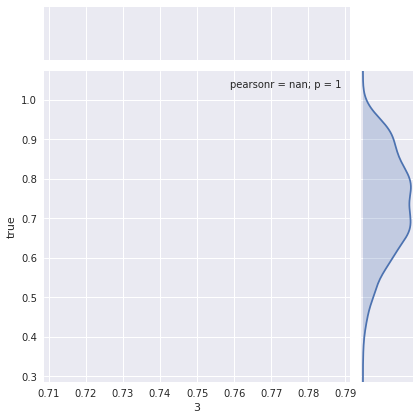

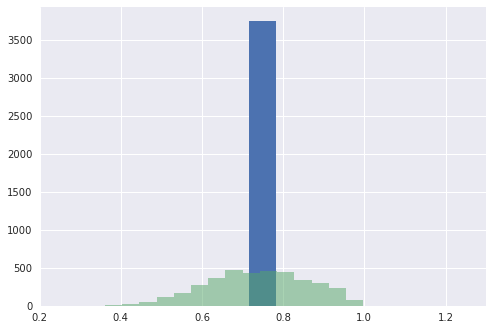

4
Average predicted lddt:  0.75
Average error 0.101257984537


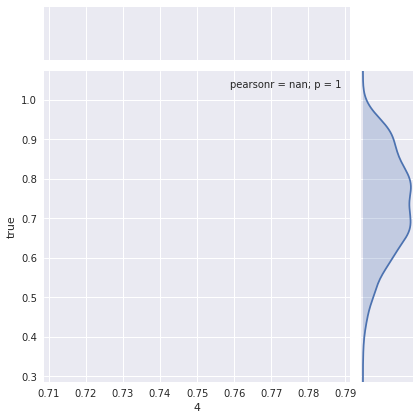

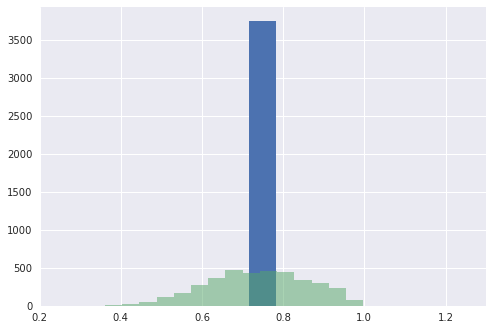

5
Average predicted lddt:  0.75
Average error 0.101257984537


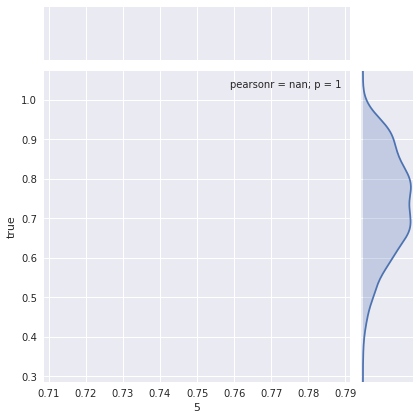

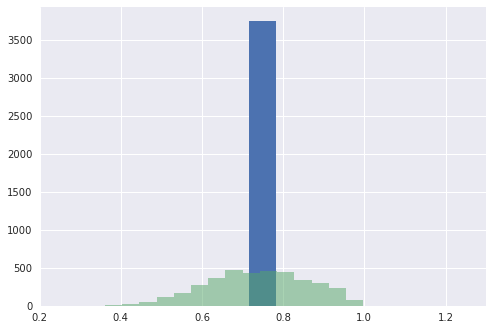

6
Average predicted lddt:  0.75
Average error 0.101257984537


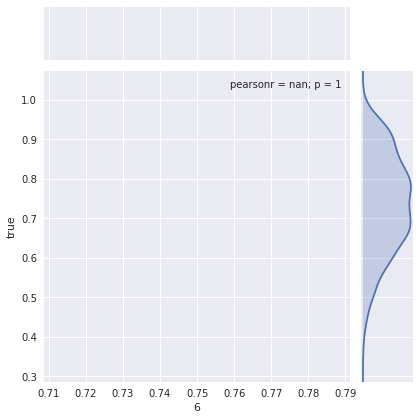

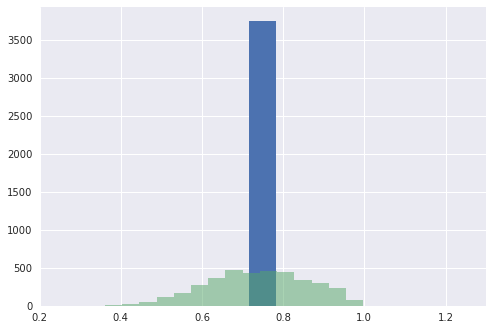

7
Average predicted lddt:  0.75
Average error 0.101257984537


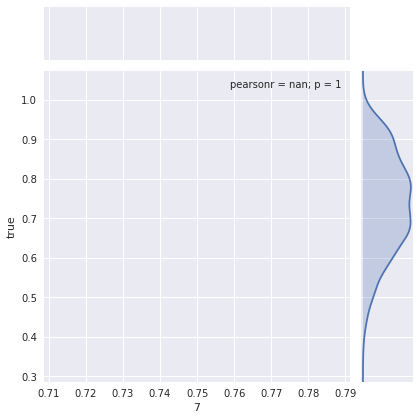

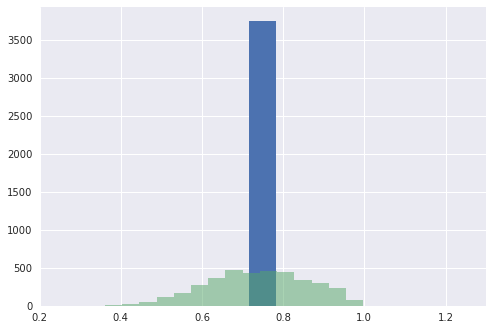

8
Average predicted lddt:  0.75
Average error 0.101257984537


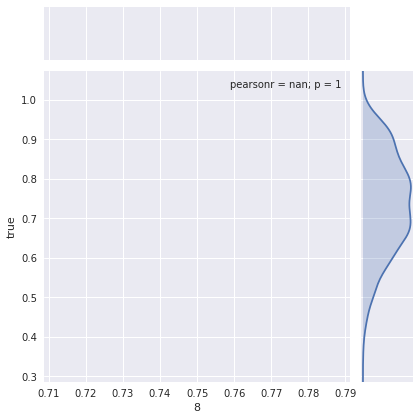

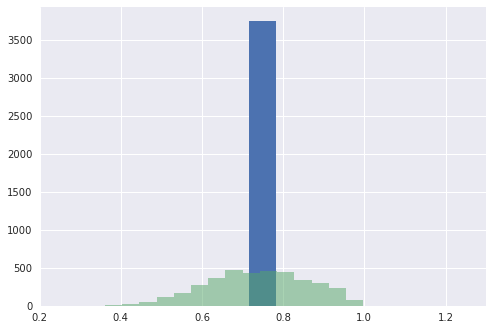

9


/hpc2n/eb/software/Core/Anaconda3/4.4.0/lib/python3.6/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/hpc2n/eb/software/Core/Anaconda3/4.4.0/lib/python3.6/site-packages/statsmodels/nonparametric/_kernel_base.py:514: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])


Average predicted lddt:  0.749999999968
Average error 0.101257984537


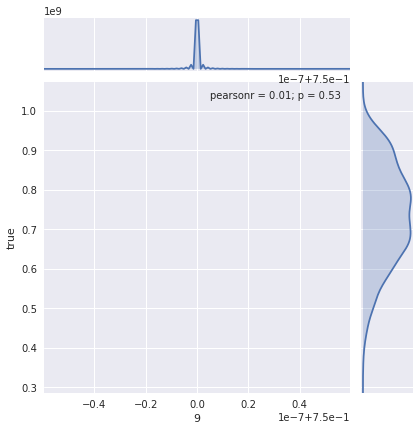

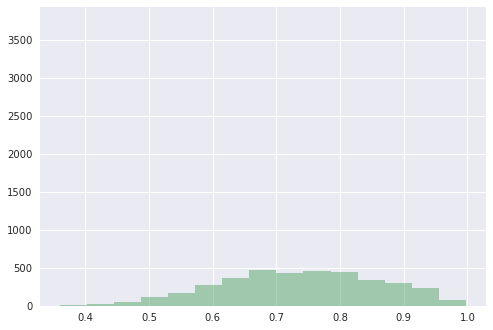

10
Average predicted lddt:  0.75
Average error 0.101257984537


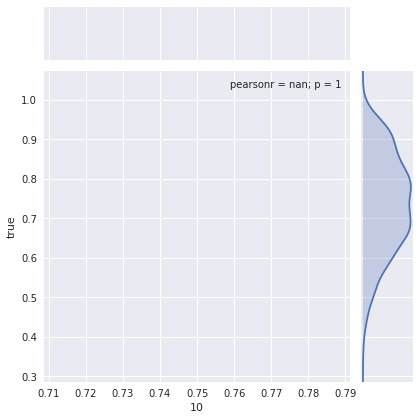

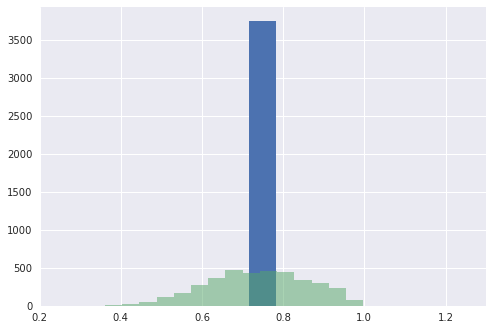

11
Average predicted lddt:  0.75
Average error 0.101257984537


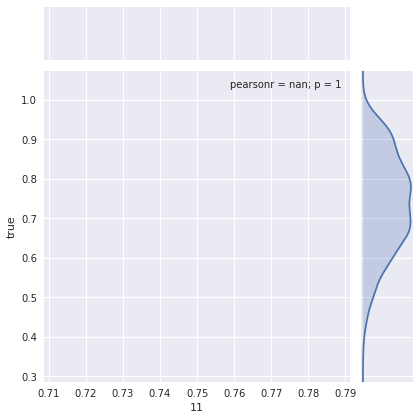

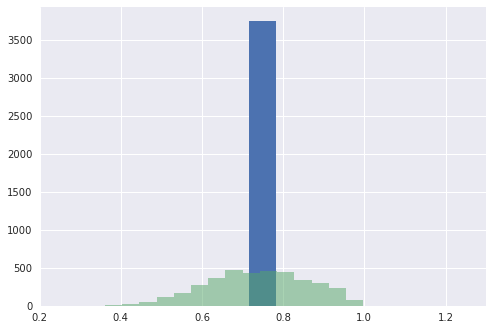

12
Average predicted lddt:  0.75
Average error 0.101257984537


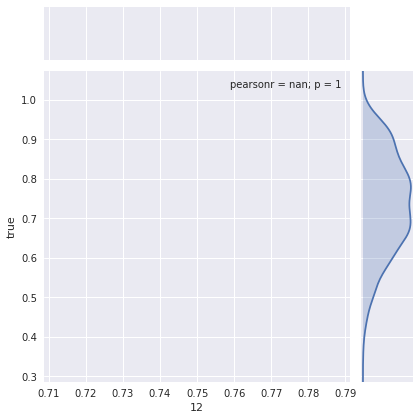

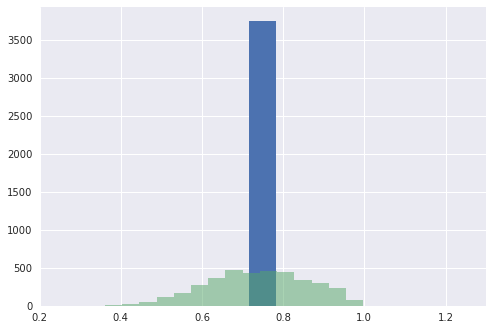

In [16]:
plot_valid('/home/p/pbryant/pfs/results/CATH/20190723/3_10_3_300_6/')

In [ ]:
plt.hist(df['pred'], bins = 15)
plt.hist(df['true'], bins = 15, alpha = 0.5)
plt.xlabel('global_lddt')
plt.ylabel('count')
plt.title('Blue = Predicted \n Orange = True')
print('Average error',np.average(np.absolute(df['true']-df['pred'])))

Average lddt:
0.7223256797956673


(array([5.000e+00, 7.000e+00, 3.000e+00, 3.000e+00, 8.000e+00, 3.000e+01,
        5.900e+01, 1.700e+02, 4.720e+02, 9.090e+02, 1.734e+03, 2.834e+03,
        4.137e+03, 5.184e+03, 5.459e+03, 5.386e+03, 4.702e+03, 3.283e+03,
        2.076e+03, 7.340e+02]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

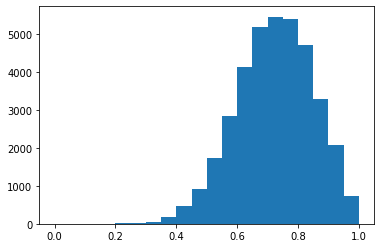

In [17]:
#Read df
complete_df = pd.read_csv('/home/patrick/complete_df.csv')
print('Average lddt:' )
print(sum(complete_df['global_lddt'])/len(complete_df))
plt.hist(complete_df['global_lddt'], bins = 20)

In [16]:
av = 0.7223256797956673
sum_dev = 0
global_lddt = [*complete_df['global_lddt']]
for i in range(0,len(global_lddt)):
    dev = np.absolute(global_lddt[i]-av)
    sum_dev+=dev
sum_dev/len(global_lddt)

0.10180077011659185

/home/patrick/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Average predicted lddt:  0.7187992837540107


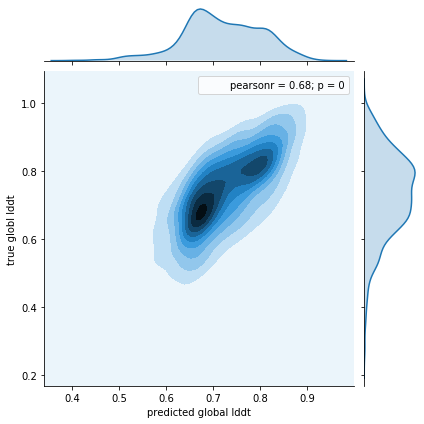

In [4]:
df = pd.read_csv('validation.tsv', sep = '\t')
df.columns=['predicted global lddt', 'true globl lddt']
true = []
pred = []
for i in range(0,len(df)):
    pred.append(literal_eval(df['predicted global lddt'][i])[0])
    true.append(df['true globl lddt'][i])
df['true globl lddt'] = true
df['predicted global lddt'] = pred
g = sns.jointplot(x='predicted global lddt', y = 'true globl lddt', data = df, kind = 'kde')
g.annotate(stats.pearsonr)
print('Average predicted lddt: ', np.average(pred) )

Average error 0.07116998182887702


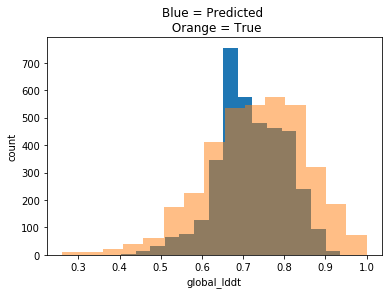

In [19]:
plt.hist(df['pred'], bins = 15)
plt.hist(df['true'], bins = 15, alpha = 0.5)
plt.xlabel('global_lddt')
plt.ylabel('count')
plt.title('Blue = Predicted \n Orange = True')
print('Average error',np.average(np.absolute(df['true']-df['pred'])))

In [16]:
np.average(np.absolute(df['true']-df['pred']))

0.07116998182887702

Average error 0.10782688635402905


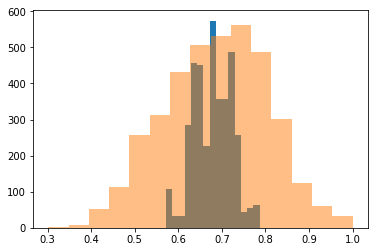

In [4]:
plt.hist(df['pred'], bins = 15)
plt.hist(df['true'], bins = 15, alpha = 0.5)
print('Average error',np.average(np.absolute(df['true']-df['pred'])))

In [3]:
df = pd.read_csv('validation.tsv', sep = '\t')
df.columns=['pred', 'true']
classes =['below','on','above']
y_true = np.asarray([*df['true']])
y_pred = np.asarray([*df['pred']])
cm = confusion_matrix(y_true, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots()
cmap=plt.cm.Blues
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        # ... and label them with the respective list entries
        xticklabels=classes, yticklabels=classes,
        title='Confusion matrix',
        ylabel='True label',
        xlabel='Predicted label')
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
fmt = '.2f'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()

np.set_printoptions(precision=2)
plt.show()

ValueError: Classification metrics can't handle a mix of continuous and multiclass targets

In [25]:
df = pd.read_csv('lr_plot.tsv', sep = '\t')
df.columns = ['lr', 'loss']

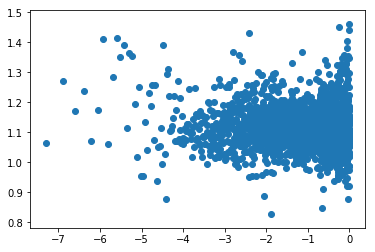

In [40]:
log_x = np.log(df['lr'])
y = df['loss']
df =  pd.DataFrame(list(zip(log_x,y)), columns = ['lr', 'loss'])
plt.scatter(log_x,y)